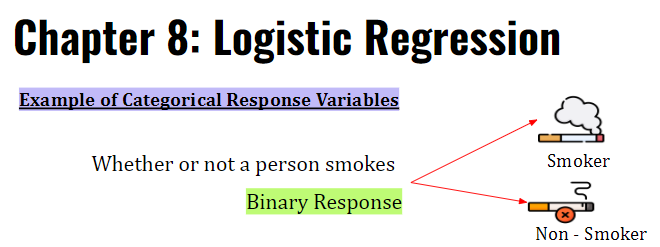

### Step 1: Import Packages

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Step 2: Data preprocessing (Get Data + Manipulate Data)

In [8]:
# read file houses.csv
df = pd.read_csv("E:/houses.csv")

In [9]:
df.head()

,HouseID,BuiltDate,AreaCode,Size,Shape,Quality,CentralAir,FirstFloorSF,SecondFloorSF,Bedroom,SaleCondition,Sold
0,1,1/1/1984,A,8450,Reg,7,Y,856,854,3,Normal,no
1,2,31/7/1985,A,9600,Reg,6,Y,1262,0,3,Normal,no
2,3,24/8/1985,A,11250,L,7,Y,920,866,3,Normal,no
3,4,30/12/1993,A,9550,L,7,Y,961,756,3,Abnormal,no
4,5,9/12/1977,A,14260,L,8,Y,1145,1053,4,Normal,no


#### 2.1 Check null value

In [10]:
#check is null
df.isnull().sum()

HouseID          0
BuiltDate        0
AreaCode         0
Size             0
Shape            0
Quality          0
CentralAir       0
FirstFloorSF     0
SecondFloorSF    0
Bedroom          0
SaleCondition    0
Sold             0
dtype: int64

#### 2.2 EDA: plot graph for checking a column "Sold" is the Target column for prediction is data balance or not

<AxesSubplot:xlabel='Sold', ylabel='count'>

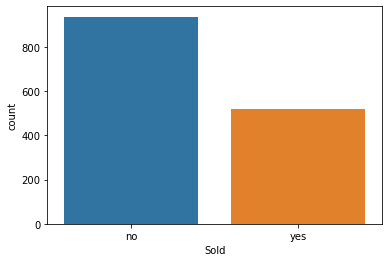

In [11]:
sns.countplot(x=df.Sold)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   HouseID        1458 non-null   int64 
 1   BuiltDate      1458 non-null   object
 2   AreaCode       1458 non-null   object
 3   Size           1458 non-null   int64 
 4   Shape          1458 non-null   object
 5   Quality        1458 non-null   int64 
 6   CentralAir     1458 non-null   object
 7   FirstFloorSF   1458 non-null   int64 
 8   SecondFloorSF  1458 non-null   int64 
 9   Bedroom        1458 non-null   int64 
 10  SaleCondition  1458 non-null   object
 11  Sold           1458 non-null   object
dtypes: int64(6), object(6)
memory usage: 136.8+ KB


#### 2.3 Data Transform: Convert feature "BuildDate"  object type to DateTime type, Then
* **Create new column in "BuildDate" to column "Year" -> using [ ]**

In [18]:
# convert column to datetime pandas
import datetime
df['BuiltDate'] = pd.to_datetime(df['BuiltDate'])

In [19]:
# Create column "Year" to split data from BuiltDate

df['Year'] = df['BuiltDate'].dt.year
df.head()


,HouseID,BuiltDate,AreaCode,Size,Shape,Quality,CentralAir,FirstFloorSF,SecondFloorSF,Bedroom,SaleCondition,Sold,Year
0,1,1984-01-01,A,8450,Reg,7,Y,856,854,3,Normal,no,1984
1,2,1985-07-31,A,9600,Reg,6,Y,1262,0,3,Normal,no,1985
2,3,1985-08-24,A,11250,L,7,Y,920,866,3,Normal,no,1985
3,4,1993-12-30,A,9550,L,7,Y,961,756,3,Abnormal,no,1993
4,5,1977-09-12,A,14260,L,8,Y,1145,1053,4,Normal,no,1977


#### 2.4 Data Cleaning: Drop some columns; no need to using for the feature prediction
* **Drop columns=['HouseID','BuiltDate']*

In [20]:
#Drop columns=['HouseID','BuiltDate']
df.drop(columns=['HouseID','BuiltDate'],inplace=True)


In [21]:
df.tail()

,AreaCode,Size,Shape,Quality,CentralAir,FirstFloorSF,SecondFloorSF,Bedroom,SaleCondition,Sold,Year
1453,A,7917,Reg,6,Y,953,694,3,Normal,no,1990
1454,A,13175,Reg,6,Y,2073,0,3,Normal,no,1987
1455,A,9042,Reg,7,Y,1188,1152,4,Normal,no,1980
1456,A,9717,Reg,5,Y,1078,0,2,Normal,yes,1981
1457,A,9937,Reg,5,Y,1256,0,3,Normal,yes,1978


####  2.5 Data Transform: The data is categorical, so Convert to numberical
* **using from sklearn.preprocessing import LabelEncoder**

In [22]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
label_encoder = LabelEncoder()

# Assigning numerical values and storing in another column

df['AreaCode'] = label_encoder.fit_transform(df['AreaCode'])
df['Shape'] = label_encoder.fit_transform(df['Shape'])
df['CentralAir'] = label_encoder.fit_transform(df['CentralAir'])
df['SaleCondition'] = label_encoder.fit_transform(df['SaleCondition'])





In [23]:
df.head()

,AreaCode,Size,Shape,Quality,CentralAir,FirstFloorSF,SecondFloorSF,Bedroom,SaleCondition,Sold,Year
0,0,8450,1,7,1,856,854,3,1,no,1984
1,0,9600,1,6,1,1262,0,3,1,no,1985
2,0,11250,0,7,1,920,866,3,1,no,1985
3,0,9550,0,7,1,961,756,3,0,no,1993
4,0,14260,0,8,1,1145,1053,4,1,no,1977


#### 2.6 Exploratory Data Analysis (EDA)
* **check the correlation between features in the dataset**

<AxesSubplot:>

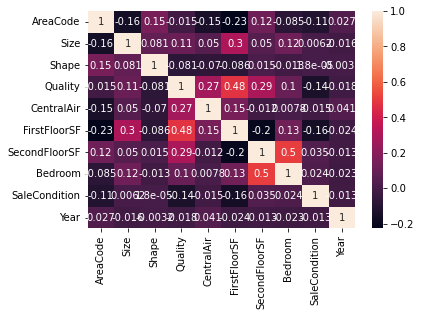

In [24]:
sns.heatmap(df.corr(), annot = True)

### Step 3: Splitting Data
* **using the function train_test_split().**
* **You need to pass 3 parameters: features, target, and test_set size.** 
* **X array in 2D**
* **y array in 1D**

In [25]:
df.columns

Index(['AreaCode', 'Size', 'Shape', 'Quality', 'CentralAir', 'FirstFloorSF',
       'SecondFloorSF', 'Bedroom', 'SaleCondition', 'Sold', 'Year'],
      dtype='object')

#### 3.1 Select Featrues 
* **X for the predictor features**
* **y for Target feature or Label feature for prediction**

In [48]:
# X array of features for training
X = df[['AreaCode', 'Size', 'Shape', 'Quality', 'CentralAir', 'FirstFloorSF',
       'SecondFloorSF', 'Bedroom', 'SaleCondition', 'Year']]




In [49]:
X.head()

,AreaCode,Size,Shape,Quality,CentralAir,FirstFloorSF,SecondFloorSF,Bedroom,SaleCondition,Year
0,0,8450,1,7,1,856,854,3,1,1984
1,0,9600,1,6,1,1262,0,3,1,1985
2,0,11250,0,7,1,920,866,3,1,1985
3,0,9550,0,7,1,961,756,3,0,1993
4,0,14260,0,8,1,1145,1053,4,1,1977


In [50]:
# Target variable: Y array
y = df['Sold']


In [51]:
y.head()

0    no
1    no
2    no
3    no
4    no
Name: Sold, dtype: object

#### 3.2 Split X and y into training and testing sets
* **from sklearn.model_selection import train_test_split**
* **You need to pass 3 parameters: features, target, and test_set size.** 

In [52]:
# import the package
from sklearn.model_selection import train_test_split

In [53]:
# Using function "train_test_split()" 
# Seperate dataset into 4 set: X_train, X_test, y_train and y_test
# test_size = 0.3 is mean seperate dataset into 70% for training and 30% for testing

X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.3,shuffle = False)

In [54]:
X_train.head(2)

,AreaCode,Size,Shape,Quality,CentralAir,FirstFloorSF,SecondFloorSF,Bedroom,SaleCondition,Year
0,0,8450,1,7,1,856,854,3,1,1984
1,0,9600,1,6,1,1262,0,3,1,1985


In [55]:
X_test.head(2)

,AreaCode,Size,Shape,Quality,CentralAir,FirstFloorSF,SecondFloorSF,Bedroom,SaleCondition,Year
1020,1,9439,1,5,1,912,336,2,1,1984
1021,0,3182,1,7,1,1504,0,2,1,1985


In [56]:
y_train.head(2)

0    no
1    no
Name: Sold, dtype: object

In [57]:
y_test.head(2)

1020    yes
1021     no
Name: Sold, dtype: object

### 4. Model Development and Prediction
* **from sklearn.linear_model import LogisticRegression**

In [58]:
# import the class fucntion LogisticRegression
from sklearn.linear_model import LogisticRegression

#### 4.1 Training is done by calling the fit method and pass the training data.

In [59]:
# instantiate the model (using the default parameters)
classifier_model = LogisticRegression(max_iter=300)


# fit the model with data
classifier_model.fit(X_train, y_train)

LogisticRegression(max_iter=300)

#### 4.2 Accuracy of the model is obtained with .score():

In [60]:
print('Train accuracy: ',classifier_model.score(X_train,y_train))
print('Test accuracy: ',classifier_model.score(X_test,y_test))

Train accuracy:  0.9019607843137255
Test accuracy:  0.8789954337899544


#### 4.3 Prediction on the "test set" using predict(). 

In [61]:
#test prediction
y_predicted = classifier_model.predict(X_test)
y_predicted

array(['yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no',
       'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'yes', 'yes', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes',
       'no', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no',
       'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no',
       'yes', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no',
       'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'no',
       'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no',
       'no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no',
       'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',
       'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'yes',
  

#### 4.4 Comparision with Actual y_test(that you already split) vs Prediction on the "test set" using model
* **Create DataFrame 2 columns**
* **using function:: pd.DataFrame.from_dict()**

In [27]:
df_prediction = pd.DataFrame.from_dict({'Actual': list(y_test.values), 'Predicted': list(y_predicted)})

In [28]:
df_prediction

,Actual,Predicted
0,yes,yes
1,no,no
2,no,no
3,yes,yes
4,no,yes
...,...,...
433,no,no
434,no,no
435,no,no
436,yes,yes


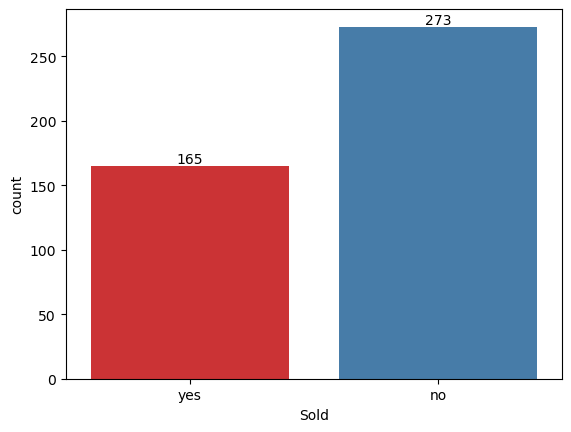

In [29]:
ax = sns.countplot(x =y_test, palette = "Set1")
for container in ax.containers:
    ax.bar_label(container)

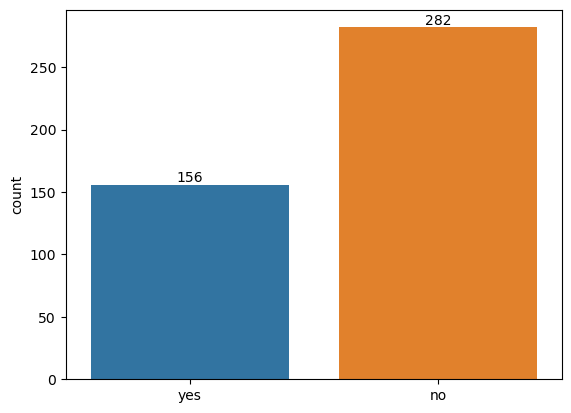

In [30]:
ax = sns.countplot(x =y_predicted)
for container in ax.containers:
    ax.bar_label(container)

#### 4.5 Model Evaluation using Confusion Matrix
* **using from sklearn.metrics import confusion_matrix**
* **Visualize the confusion matrix using Heatmap**

In [31]:
#import package
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_predicted)
cf_matrix

array([[251,  22],
       [ 31, 134]], dtype=int64)

#### Confusion Matrix
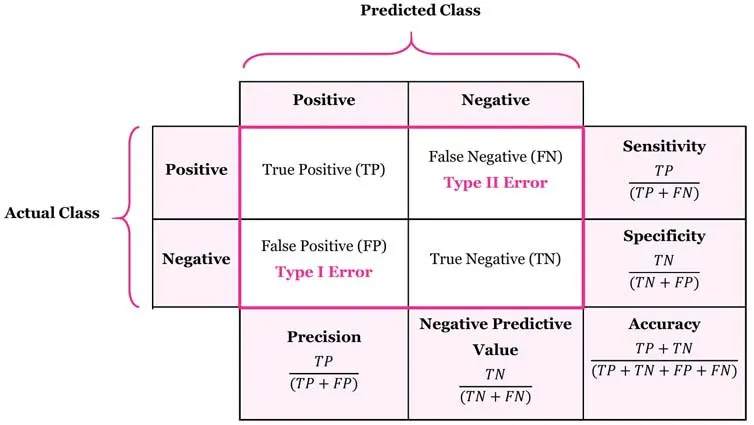
ref: https://medium.com/@mirthful_sunset_cattle_231/confusion-matrix-48cc396b1b58

Text(0.5, 23.52222222222222, 'Predicted label')

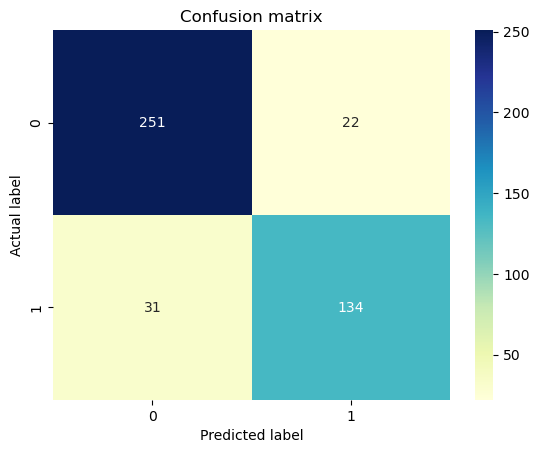

In [32]:
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### 4.6 Classification report
* **using from sklearn.metrics import classification_report**
* **Accuracy: represents the number of correctly classified data instances over the total number of data instances.**
* **Precision (positive predictive value) in classifying the data instances**
* **Recall: should ideally be 1 (high) for a good classifier.**
* **F1-score is a metric which takes into account both precision and recall: F1 Score becomes 1 only when precision and recall are both 1**


In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

          no       0.89      0.92      0.90       273
         yes       0.86      0.81      0.83       165

    accuracy                           0.88       438
   macro avg       0.87      0.87      0.87       438
weighted avg       0.88      0.88      0.88       438



In [34]:
# accuracy = (TP+TN)/(TP+TN+FP+FN)
print((251+134)/(251+22+31+134))

0.8789954337899544


#### 4.7 New data -> for using a prediction model
* **Create new data frame of features that you want to prediction**

In [35]:
data =np.array([[0,9717,1,5,1,1078,0,2,1,1989]])
X_new3= pd.DataFrame(data, columns=['AreaCode', 'Size', 'Shape', 'Quality', 'CentralAir', 'FirstFloorSF',
       'SecondFloorSF', 'Bedroom', 'SaleCondition','Year'])
X_new3

,AreaCode,Size,Shape,Quality,CentralAir,FirstFloorSF,SecondFloorSF,Bedroom,SaleCondition,Year
0,0,9717,1,5,1,1078,0,2,1,1989


In [36]:
print('Prediction is ',classifier_model.predict(X_new3))
print('Prediction probability is ', classifier_model.predict_proba(X_new3))

Prediction is  ['yes']
Prediction probability is  [[0.19695044 0.80304956]]


* **Crate a program function for using a prediction this model**

In [37]:
## Define function create new data series for prediction
def CreatePrediction(listFeatures):
    data =np.array([listFeatures])
    X_new= pd.DataFrame(data, columns=['AreaCode', 'Size', 'Shape', 'Quality', 'CentralAir', 'FirstFloorSF',
       'SecondFloorSF', 'Bedroom', 'SaleCondition','Year'])
    return X_new
    

In [38]:
#start program
#data =np.array([[0,9717,1,5,1,1078,0,2,1,1989]])
listFeatures = []
listFeatures.append(input('AreaCode : '))
listFeatures.append(input('Size : '))
listFeatures.append(input('Shape : '))
listFeatures.append(input('Quality : '))
listFeatures.append(input('CentralAir : '))
listFeatures.append(input('FirstFloorSF : '))
listFeatures.append( input('SecondFloorSF : '))
listFeatures.append(input('Bedroom : '))
listFeatures.append(input('SaleCondition : '))
listFeatures.append( input('Year : '))
# Call function create new dataseries for prediction
X_new = CreatePrediction(listFeatures)

# Prediction data
print("++++++++++++++++++++++++++++++++++++++++++")
print('Prediction is ',classifier_model.predict(X_new))
print('Prediction probability is ', classifier_model.predict_proba(X_new))

AreaCode : 1
Size : 9717
Shape : 1
Quality : 5
CentralAir : 1
FirstFloorSF : 1078
SecondFloorSF : 0
Bedroom : 2
SaleCondition : 1
Year : 1989
++++++++++++++++++++++++++++++++++++++++++
Prediction is  ['yes']
Prediction probability is  [[0.16458331 0.83541669]]
